In [1]:
from dataset import Dataset
from classificadores import PerceptronSimples, MultiLayerPerceptron, ExtremeLearningMachine

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Conjunto de dados Câncer de Mama =================================================
colunas = ["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

dataset = Dataset.from_file( 
    filepath = r"datasets\wdbc.data", 
    label_column = 1,
    delimiter = ",",  
    column_names = colunas
).ensure_numeric_labels().remove_features(["ID"]).normalize()

dataset.vectorize_labels()

print(dataset)

Dataset(instâncias=569, features=30, classes=2)


In [3]:
# Conjunto de dados Coluna Vertebral =================================================
colunas = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "degree spondylolisthesis", "class"]

dataset = Dataset.from_file( 
    filepath = r"datasets\column_3C.dat", 
    label_column = -1,
    delimiter = " ",  
    column_names = colunas
).ensure_numeric_labels().normalize()

dataset.vectorize_labels()

print(dataset)

Dataset(instâncias=310, features=6, classes=3)


In [4]:
# Realiza o suffle do conjunto de dados e divide o dataset
shuffled_dataset = dataset.shuffle()
train_dataset, test_dataset = shuffled_dataset.split()

In [5]:
MLP = MultiLayerPerceptron( train_dataset, q = 3 )

In [6]:
Js = MLP.train( max_epocas = 500, eta = 0.001, reset_weights=True )

Treinamento encerrado com 54 erros após 500 épocas.	


Text(0.5, 1.0, 'MLP: épocas=500, $\\eta=0.001$')

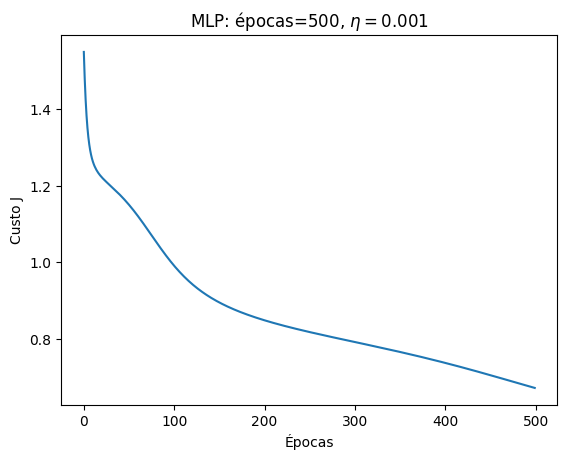

In [7]:
i, J = zip(*Js)
plt.plot( i, J, )

plt.ylabel("Custo J")
plt.xlabel("Épocas")
plt.title(rf"MLP: épocas=500, $\eta=0.001$" )
